# Using APIs to scrape data

Today we'll learn how to scrape data from websites using APIs. In particular, we'll be using the PRAW Python library to get data from [Reddit](http://reddit.com).

Things to know about APIs:

- API stands for Application Programming Interface. APIs are a great way for your program to interface with other applications to get data

- APIs aren't some magical thing that all websites have. The developers of every website may or may not choose to build and maintain an API that the public can use.

- Many popular sites have APIs! Often times, using APIs is much easier than manually scraping a website for data.

- APIs are absolutely essential to know if you are interested in web development or working with web data.


## Reddit API Client Setup
Today we'll be using PRAW to access Reddit data from Python.

For simplicity, we have already set up an account for you guys to play with. If you are interested in creating your own reddit bot, the setup guides you need are [here](https://praw.readthedocs.io/en/latest/getting_started/quick_start.html) and [here](https://github.com/reddit-archive/reddit/wiki/OAuth2).

First, we'll create a Reddit instance to use the API.


In [45]:
import praw

reddit = praw.Reddit(client_id='TpLAyz8_D5A8FA',
                     client_secret='MtHyUXr84NF6AMbPjWm7e50x9mY',
                     user_agent='Node student laptop python',
                     username='hackcvillenode',
                     password='hackcvillenode')

- client_id: ID given to every reddit API client

- client_secret: password given to every reddit API client

- user_agent: a string describing the device accessing the API

- username: associated reddit account username (optional)

- password: associated reddit account password (optional)

## Retrieving post data using APIs

As a quick warm up, we'll print out the top 10 posts on [http://reddit.com/r/dataisbeautiful](http://reddit.com/r/dataisbeautiful) and the number of upvotes and name of the author of each post.

Note: If you are ever unsure how to access parts of the API, the best thing you can do is to consult the API documentation. PRAW's documentation is here: https://praw.readthedocs.io/en/latest/index.html

In [41]:
print("Upvotes\tTitle")
for submission in reddit.subreddit('dataisbeautiful').hot(limit=10):
    print("{}\t{}".format(submission.ups, submission.title))
    print("\t by: " + submission.author.name)

Upvotes	Title
13	[Lounge] This week is a Bye Week for the DatViz Battles. Use this thread for off-topic discussion, smack talk, and cool suggestions!
	 by: AutoModerator
9	[Topic][Open] Open Discussion Monday — Anybody can post a general visualization question or start a fresh discussion!
	 by: AutoModerator
40790	Chance of Death per Year [OC]
	 by: maxandron
64	Wrote a Python script to map out everywhere I had been in 2017 using Google Location History [OC]
	 by: azure17
70	Chance of Survival by Age IMPROVED and UPDATED [OC]
	 by: joeycloud
15062	NSFW Matrix of Reddit's top 100 /r/gonewild contributors (Interactive) [OC]
	 by: ABCosmos
29	My friend and I still record our wanks [OC]
	 by: Akhlys1
55	SpaceX Falcon 9 launch to landing trajectories [OC]
	 by: veebay
23	Visualizing functionally-related brain regions [OC]
	 by: quorumetrix
12	Article on regional tastes in the US
	 by: Nexre


Ok, that's really cool! But it is a little hard to read. Let's try this again, but this time let's put the data into a Pandas dataframe

In [83]:
import pandas as pd
from datetime import datetime
from dateutil import tz
df = pd.DataFrame([], columns="Upvotes Title Author URL NumComments Date".split())
df.head()

for submission in reddit.subreddit('dataisbeautiful').hot(limit=15):
    if (submission.over_18 or submission.author.name == "AutoModerator"): # Node is 100% SFW ;)
        continue
    df = df.append({
        "Upvotes": submission.ups,
        "Title": submission.title,
        "Author": submission.author.name,
        "URL": submission.url,
        "NumComments": submission.num_comments,
        "Date": datetime.utcfromtimestamp(submission.created_utc), # Date is stored as an integer.
                                                                   # This converts the number to a datetime object.
    }, ignore_index=True)

df.head(10)

,Upvotes,Title,Author,URL,NumComments,Date
0,41871,Chance of Death per Year [OC],maxandron,https://i.redd.it/ov7izfo89ed01.png,2306,2018-01-31 12:14:12
1,78,Wrote a Python script to map out everywhere I ...,azure17,https://vimeo.com/253140956,20,2018-01-31 16:27:53
2,72,Chance of Survival by Age IMPROVED and UPDATED...,joeycloud,https://i.redd.it/vt0tv6k21fd01.png,17,2018-01-31 14:45:39
3,57,SpaceX Falcon 9 launch to landing trajectories...,veebay,https://i.redd.it/herydut5rdd01.png,4,2018-01-31 10:27:46
4,24,Visualizing functionally-related brain regions...,quorumetrix,https://i.redd.it/bfs8p32tsed01.gif,2,2018-01-31 14:01:13
5,9,The most popular US names over time [OC],jazzlw,https://i.redd.it/jq6i5lqeggd01.png,3,2018-01-31 19:32:40
6,14,Article on regional tastes in the US,Nexre,https://medium.com/google-news-lab/what-is-the...,0,2018-01-31 16:26:20
7,16,Members of the European Parliament: The lingui...,Bezbojnicul,https://arnoldplaton.wordpress.com/2018/01/30/...,2,2018-01-31 12:59:01
8,7,Annual and Cumulative Non-survival Probability...,NewlyMintedCentipede,https://i.imgur.com/hb3Gj7T.png,2,2018-01-31 18:03:23
9,3,My coffee consumption for 2017 [OC],akellymurphy,https://i.redd.it/31uwwpjlygd01.jpg,0,2018-01-31 21:14:04


If you want to see every single data attribute of a post, use the Python `vars()` function.

In [80]:
vars(reddit.subreddit('popular').hot(limit=1).next())

{'_comments_by_id': {},
 '_fetched': False,
 '_flair': None,
 '_info_params': {},
 '_mod': None,
 '_reddit': <praw.reddit.Reddit at 0x11b513048>,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='Bombaskos'),
 'author_flair_css_class': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'brand_safe': True,
 'can_gild': True,
 'can_mod_post': False,
 'clicked': False,
 'comment_limit': 2048,
 'comment_sort': 'best',
 'contest_mode': False,
 'created': 1517446152.0,
 'created_utc': 1517417352.0,
 'distinguished': None,
 'domain': 'i.imgur.com',
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'hidden': False,
 'hide_score': False,
 'id': '7ub9ax',
 'is_crosspostable': True,
 'is_reddit_media_domain': False,
 'is_self': False,
 'is_video': False,
 'likes': None,
 'link_flair_css_class': None,
 'link_flair_text': None,
 'locked': False,
 'media': None,
 'media_embed': {},
 'mod_note': None,
 'mod_reason_by': None,
 'mod_re

## Retrieving user data with the PRAW API

Getting data about users is similar to getting data about posts.

Let's retrieve information about the 50 most recent comments made by /u/spez, one of reddit's founders.

First let's see what kind of attributes a comment has.

In [84]:
vars(reddit.redditor('spez').comments.new(limit=1).next())

{'_fetched': True,
 '_info_params': {},
 '_mod': None,
 '_reddit': <praw.reddit.Reddit at 0x11b513048>,
 '_replies': [],
 '_submission': None,
 'approved_at_utc': None,
 'approved_by': None,
 'archived': False,
 'author': Redditor(name='spez'),
 'author_flair_css_class': None,
 'author_flair_text': None,
 'banned_at_utc': None,
 'banned_by': None,
 'body': "Don't sell yourself short!",
 'body_html': '<div class="md"><p>Don&#39;t sell yourself short!</p>\n</div>',
 'can_gild': True,
 'can_mod_post': False,
 'collapsed': False,
 'collapsed_reason': None,
 'controversiality': 0,
 'created': 1517374616.0,
 'created_utc': 1517345816.0,
 'distinguished': None,
 'downs': 0,
 'edited': False,
 'gilded': 0,
 'id': 'dthf1f0',
 'is_submitter': True,
 'likes': None,
 'link_author': 'spez',
 'link_id': 't3_7u2zpi',
 'link_permalink': 'https://www.reddit.com/r/announcements/comments/7u2zpi/not_my_first_could_be_my_last_state_of_the/',
 'link_title': 'Not my first, could be my last, State of the Snoo

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

df = pd.DataFrame([], columns="Score Body URL Date".split())
df.head()

for comment in reddit.redditor('spez').comments.new(limit=200):
    if (comment.over_18): # Node is 100% SFW ;)
        continue
    df = df.append({
        "Score": comment.score,
        "Body": comment.body,
        "URL": comment.link_permalink,
        "Date": datetime.utcfromtimestamp(comment.created_utc), # Date is stored as an integer.
                                                                   # This converts the number to a datetime object.
    }, ignore_index=True)

df.head(10)

,Score,Body,URL,Date
0,77,Don't sell yourself short!,https://www.reddit.com/r/announcements/comment...,2018-01-30 20:56:56
1,15,"The goal for ticket response time is 24h, whic...",https://www.reddit.com/r/announcements/comment...,2018-01-30 20:19:16
2,696,No need to apologize. I'm sorry for your loss.,https://www.reddit.com/r/announcements/comment...,2018-01-30 20:11:52
3,255,"I asked, but he doesn't want to talk about the...",https://www.reddit.com/r/announcements/comment...,2018-01-30 20:05:32
4,-31,Generally the mods of pics have been cooperati...,https://www.reddit.com/r/announcements/comment...,2018-01-30 20:02:42
5,-479,"Nearly all of those posts were banned by mods,...",https://www.reddit.com/r/announcements/comment...,2018-01-30 19:56:32
6,-192,Reddit is more communal and has more shared sp...,https://www.reddit.com/r/announcements/comment...,2018-01-30 19:51:41
7,326,"We'd really like to, tbh, but there are major ...",https://www.reddit.com/r/announcements/comment...,2018-01-30 19:45:19
8,2544,Agreed. I think I responded to this elsewhere:...,https://www.reddit.com/r/announcements/comment...,2018-01-30 19:44:35
9,1599,Deal.,https://www.reddit.com/r/announcements/comment...,2018-01-30 19:42:01


Awesome!

Let's try to incorporate some data vis. Let's graph /u/spez's comment score with respect to time.

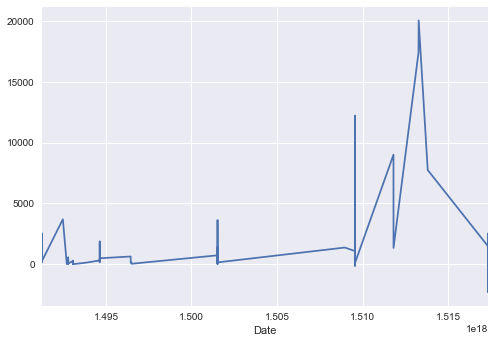

In [114]:
sns.tsplot(data = df['Score'], time = df['Date'], legend=True)
plt.show()